In [66]:

import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress



In [52]:

url = "https://data.cdc.gov/resource/i2ek-k3pa.json?"
params = {"GeographicLevel":"City",
          "DataValueTypeID":"AgeAdjPrv"}

mhealth_data = requests.get(url, params=params).json()
pprint(mhealth_data)


[{'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0150000',
  'cityname': 'Mobile',
  'data_value': '16.3',
  'data_value_type': 'Age-adjusted prevalence',
  'data_value_unit': '%',
  'datasource': 'BRFSS',
  'datavaluetypeid': 'AgeAdjPrv',
  'geographiclevel': 'City',
  'geolocation': {'human_address': '{"address": "", "city": "", "state": "", '
                                   '"zip": ""}',
                  'latitude': '30.6776248648',
                  'longitude': '-88.1184482714',
                  'needs_recoding': False},
  'high_confidence_limit': '16.5',
  'low_confidence_limit': '16.2',
  'measure': 'Mental health not good for >=14 days among adults aged >=18 '
             'Years',
  'measureid': 'MHLTH',
  'populationcount': '195111',
  'short_question_text': 'Mental Health',
  'stateabbr': 'AL',
  'statedesc': 'Alabama',
  'uniqueid': '0150000',
  'year': '2017'},
 {'category': 'Health Outcomes',
  'categoryid': 'HLTHOUT',
  'cityfips': '0427400

In [53]:
#Create the DataFrame
mental_health_df = pd.DataFrame()
mental_health_df["City Name"] = ""
mental_health_df["State"] = ""
mental_health_df["Lat"] = ""
mental_health_df["Lng"] = ""
mental_health_df["Value"] = ""

In [54]:
# add values to dataframe

for x in range (len(mhealth_data)):
    mental_health_df.loc[x, "City Name"] = mhealth_data[x]["cityname"]
    mental_health_df.loc[x, "State"] = mhealth_data[x]["stateabbr"]
    mental_health_df.loc[x, "Lat"] = mhealth_data[x]["geolocation"]["latitude"]
    mental_health_df.loc[x, "Lng"] = mhealth_data[x]["geolocation"]["longitude"]
    mental_health_df.loc[x, "Value"] = mhealth_data[x]["data_value"]

mental_health_df.head()
                                              
                         

,City Name,State,Lat,Lng,Value
0,Mobile,AL,30.6776248648,-88.1184482714,16.3
1,Gilbert,AZ,33.310149392,-111.746237467,10.9
2,Avondale,AZ,33.3858367405,-112.323626619,13.5
3,Montgomery,AL,32.3472645333,-86.2677059552,15.8
4,Anchorage,AK,61.149868731,-149.111113424,11.0


In [55]:
#Get No Leisure time for PHysical Activity
no_leisure_url = "https://data.cdc.gov/resource/axqz-rkkp.json"
params = {
    "GeographicLevel" : "City",
    "DataValueTypeID" : "AgeAdjPrv"

}
leisure_data = requests.get(no_leisure_url, params=params).json()

print(json.dumps(leisure_data, indent=4, sort_keys=True))

[
    {
        "category": "Unhealthy Behaviors",
        "categoryid": "UNHBEH",
        "cityfips": "0877290",
        "cityname": "Thornton",
        "data_value": "22.0",
        "data_value_type": "Age-adjusted prevalence",
        "data_value_unit": "%",
        "datasource": "BRFSS",
        "datavaluetypeid": "AgeAdjPrv",
        "geographiclevel": "City",
        "geolocation": {
            "human_address": "{\"address\": \"\", \"city\": \"\", \"state\": \"\", \"zip\": \"\"}",
            "latitude": "39.9193994188",
            "longitude": "-104.944956758",
            "needs_recoding": false
        },
        "high_confidence_limit": "22.4",
        "low_confidence_limit": "21.6",
        "measure": "No leisure-time physical activity among adults aged >=18 Years",
        "measureid": "LPA",
        "populationcount": "118772",
        "short_question_text": "Physical Inactivity",
        "stateabbr": "CO",
        "statedesc": "Colorado",
        "uniqueid": "0877290",


In [56]:
#create leisure_time_df
leisure_time_df = pd.DataFrame()
leisure_time_df["City Name"] = ""
leisure_time_df["% No Leisure Time for Physical Activity"] = ""

leisure_time_df

,City Name,% No Leisure Time for Physical Activity


In [57]:
for x in range(len(leisure_data)):
    leisure_time_df.loc[x, "City Name"] = leisure_data[x]["cityname"]
    leisure_time_df.loc[x, "% No Leisure Time for Physical Activity"] = leisure_data[x]["data_value"]

leisure_time_df.head()

,City Name,% No Leisure Time for Physical Activity
0,Thornton,22.0
1,Kansas City,39.3
2,Independence,29.8
3,San Antonio,34.8
4,Virginia Beach,23.7


In [70]:
complete_df = pd.merge(mental_health_df, leisure_time_df, on="City Name")
complete_df["Value"] = complete_df["Value"].astype(float)
complete_df["% No Leisure Time for Physical Activity"] = complete_df["% No Leisure Time for Physical Activity"].astype(float)
complete_df.head()

,City Name,State,Lat,Lng,Value,% No Leisure Time for Physical Activity
0,Mobile,AL,30.6776248648,-88.1184482714,16.3,35.7
1,Gilbert,AZ,33.310149392,-111.746237467,10.9,19.6
2,Avondale,AZ,33.3858367405,-112.323626619,13.5,28.3
3,Montgomery,AL,32.3472645333,-86.2677059552,15.8,35.1
4,Anchorage,AK,61.149868731,-149.111113424,11.0,21.4


In [71]:
#highest 10 cities for depression
highest_depression = complete_df.sort_values(by="Value", ascending=False)
highest_depression.head()

,City Name,State,Lat,Lng,Value,% No Leisure Time for Physical Activity
349,Flint,MI,43.0236339386,-83.6920640313,19.6,37.1
462,Reading,PA,40.3399678686,-75.9266128837,18.9,38.7
392,Camden,NJ,39.9361910066,-75.1072961899,18.9,45.4
431,Youngstown,OH,41.0993286607,-80.6463187081,18.8,43.9
341,Detroit,MI,42.3847015631,-83.1053178776,18.7,39.2


In [72]:
lowest_depression = complete_df.sort_values("Value")
lowest_depression.head()

,City Name,State,Lat,Lng,Value,% No Leisure Time for Physical Activity
373,Plymouth,MN,45.022462874,-93.4616016242,8.3,17.8
142,Sunnyvale,CA,37.3834416566,-122.025624324,8.4,14.8
67,Fremont,CA,37.5278685405,-121.984121512,8.4,15.6
248,Johns Creek,GA,34.0332991998,-84.2027195506,8.5,20.5
138,San Ramon,CA,37.7623705462,-121.938150371,8.6,13.3


In [73]:
highest_noleisure = complete_df.sort_values(by="% No Leisure Time for Physical Activity", ascending=False)
highest_noleisure.head()

,City Name,State,Lat,Lng,Value,% No Leisure Time for Physical Activity
392,Camden,NJ,39.9361910066,-75.1072961899,18.9,45.4
431,Youngstown,OH,41.0993286607,-80.6463187081,18.8,43.9
395,Passaic,NJ,40.8574581109,-74.1281123174,17.4,43.9
389,Paterson,NJ,40.9146874977,-74.1624181271,17.0,42.7
500,Laredo,TX,27.5482572475,-99.4867797312,15.1,42.5


In [74]:
lowest_noleisure = complete_df.sort_values("% No Leisure Time for Physical Activity")
lowest_noleisure.head()


,City Name,State,Lat,Lng,Value,% No Leisure Time for Physical Activity
90,Newport Beach,CA,33.6150103607,-117.867364631,9.4,12.9
138,San Ramon,CA,37.7623705462,-121.938150371,8.6,13.3
532,Bellevue,WA,47.5962437606,-122.153569982,9.6,13.4
173,Boulder,CO,40.0275510494,-105.25151776,10.4,13.4
112,Redondo Beach,CA,33.8575280159,-118.376567893,9.3,13.6


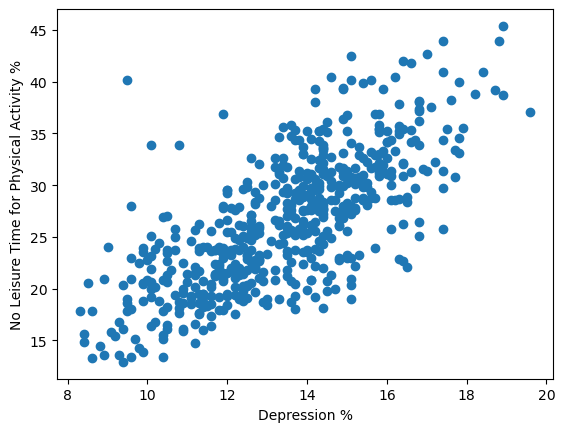

In [65]:
#Building a scatter plot for depression values and % No Leisure Time for physical Activity
x_values = complete_df["Value"]
y_values = complete_df["% No Leisure Time for Physical Activity"]

plt.scatter(x_values, y_values)
plt.xlabel("Depression %")
plt.ylabel("No Leisure Time for Physical Activity %")

#show plot
plt.show()



The r-value is 0.7272456795661382


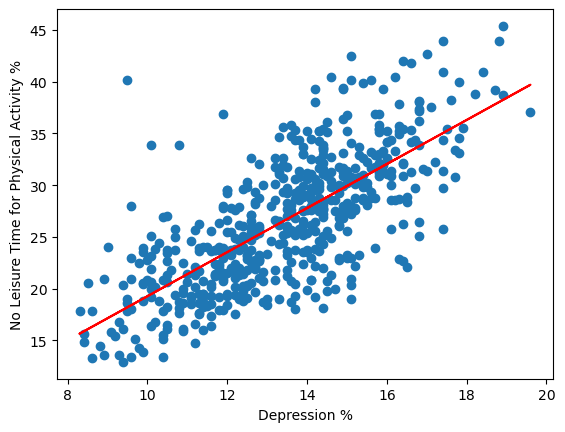

In [76]:
#Building a scatter plot and linear regression for depression values and % No Leisure Time for physical Activity
x_values = complete_df["Value"]
y_values = complete_df["% No Leisure Time for Physical Activity"]

#linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values*slope + intercept 
plt.plot(x_values, regress_values, 'r')

plt.scatter(x_values, y_values)
plt.xlabel("Depression %")
plt.ylabel("No Leisure Time for Physical Activity %")

#show plot
print(f"The r-value is {rvalue}")
plt.show()

In [102]:
# States with the lowest rates of deperession based on average amount for each city listed. 
states_average = complete_df.groupby(complete_df["State"]).mean()
states_depression = states_average.sort_values("Value")
lowest_depression = states_depression["Value"].head(10)
lowest_depression
 


/var/folders/w9/k4xhwbsx2f3cdrnn0qftk1x00000gn/T/ipykernel_92423/1544521950.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  states_average = complete_df.groupby(complete_df["State"]).mean()


State
MN    10.230000
HI    10.500000
ND    10.700000
SD    10.950000
AK    11.000000
DC    11.100000
NE    11.500000
WY    11.600000
CO    11.870588
CA    12.281395
Name: Value, dtype: float64

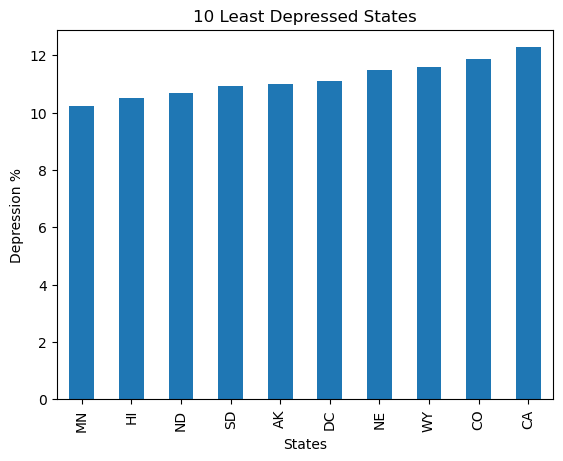

In [109]:
#Bottom 10 States for Depression %
lowest_depression.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Depression %")
plt.title("10 Least Depressed States")
plt.show()

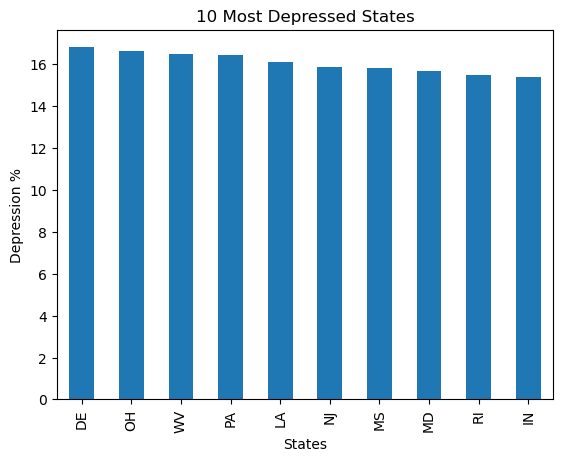

In [110]:
#Top 10 States for Depression %
highest_depression = states_average.sort_values(by="Value", ascending=False)
highest_depression = highest_depression["Value"].head(10)

highest_depression.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("Depression %")
plt.title("10 Most Depressed States")
plt.show()

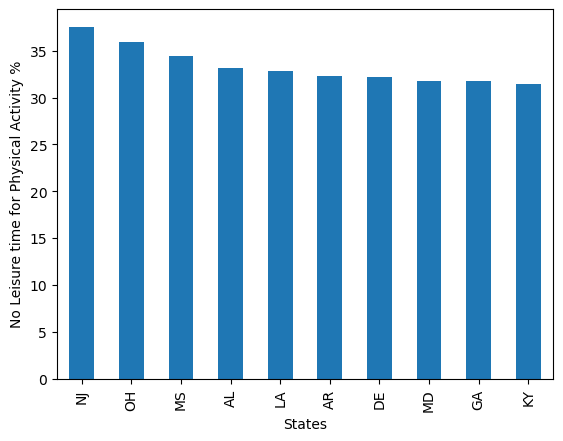

In [106]:
#Top 10 states for percentage of people with no leisure time for physical activity
highest_no_leisure = states_average.sort_values(by="% No Leisure Time for Physical Activity", ascending=False)
highest_no_leisure = highest_no_leisure["% No Leisure Time for Physical Activity"].head(10)

#Bar Graph of Data
highest_no_leisure.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("No Leisure time for Physical Activity %")
plt.title("Top 10 States for No Leisure time for Physical Acti")
plt.show()


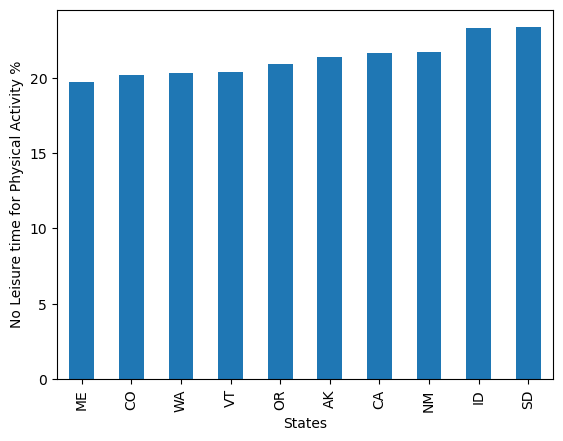

In [108]:
#States with the lowest percentage of people who has no leisure time for physical activity
lowest_no_leisure = states_average.sort_values("% No Leisure Time for Physical Activity")
lowest_no_leisure = lowest_no_leisure["% No Leisure Time for Physical Activity"].head(10)

#Bar Graph of Data
lowest_no_leisure.plot(kind="bar")
plt.xlabel("States")
plt.ylabel("No Leisure time for Physical Activity %")
plt.show()